Now, the dataset contains originals variables + additional engineered variables
<br>Steps I have followed:

**Data preprocessing:**
1. Data Transformation
2. One-hot encoding

**Feature Selection**
1. Variance Threshold
2. Recursive Feature Elimination

**Machine Learning** (Training with 5 fold cross-validation and grid search)
1. Linear Regression
2. Decision Tree
3. Random Forest
4. Gradient Boosting
5. Extreme Gradient Boosting

**Target Variable Transformation**

**Comparison of the Key performance Indicators:**
1. Mean Absolute Error
2. Root Mean Squared Error
3. R squared

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# data transformation
from sklearn.preprocessing import PowerTransformer

# Feature selection
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFE

# dimensionality reduction
from sklearn.decomposition import PCA

# accuracy metrics for the regression problem
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to save the models
import pickle

# statistical model
import statsmodels.api as sm

# Extreme Gradient Boosting
import xgboost as xgb

# for the tree diagram
# from sklearn.tree import export_graphviz
# from subprocess import call

# import graphviz
from xgboost import plot_tree

# to remove unnecessary warnings
import warnings

warnings.filterwarnings('ignore')

# to generate clear images
sns.set_context('talk')

# set the background of the images
sns.set_style('darkgrid')

# import regressor algorithms
from ipynb.fs.full.ML_algorithms import linear_regressor
from ipynb.fs.full.ML_algorithms import decision_tree_regressor
from ipynb.fs.full.ML_algorithms import random_forest_regressor
from ipynb.fs.full.ML_algorithms import gradient_boosting_regressor
from ipynb.fs.full.ML_algorithms import X_gradient_boosting_regressor
from ipynb.fs.full.ML_algorithms import X_gradient_boosting_TT_regressor

#### Reading the dataset

In [2]:
# read the csv file in a dataframe
df = pd.read_csv("bmw_used_cars.csv")

# Let's check the data
display(df.head())
display(df.info())
display(df.describe())

model  year  price transmission  mileage fuelType  tax   mpg  \
0   5 Series  2014  11200    Automatic    67068   Diesel  125  57.6   
1   6 Series  2018  27000    Automatic    14827   Petrol  145  42.8   
2   5 Series  2016  16000    Automatic    62794   Diesel  160  51.4   
3   1 Series  2017  12750    Automatic    26676   Diesel  145  72.4   
4   7 Series  2014  14500    Automatic    39554   Diesel  160  50.4   

   engineSize Engine_Size road_tax_range mileage_range    car_age_range  
0         2.0      medium      below_150          Good  between_5_to_10  
1         2.0      medium      below_150     Excellent          below_5  
2         3.0       large        150_300          Good          below_5  
3         1.5      medium      below_150     Excellent          below_5  
4         3.0       large        150_300     Excellent  between_5_to_10

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10686 entries, 0 to 10685
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   model           10686 non-null  object 
 1   year            10686 non-null  int64  
 2   price           10686 non-null  int64  
 3   transmission    10686 non-null  object 
 4   mileage         10686 non-null  int64  
 5   fuelType        10686 non-null  object 
 6   tax             10686 non-null  int64  
 7   mpg             10686 non-null  float64
 8   engineSize      10686 non-null  float64
 9   Engine_Size     10686 non-null  object 
 10  road_tax_range  10686 non-null  object 
 11  mileage_range   10686 non-null  object 
 12  car_age_range   10686 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 1.1+ MB


None

year          price        mileage           tax           mpg  \
count  10686.000000   10686.000000   10686.000000  10686.000000  10686.000000   
mean    2017.074396   22695.052311   25550.388171    132.056429     54.227756   
std        2.354972   11403.223311   25197.858356     61.372681     15.567906   
min     1996.000000    1200.000000       1.000000      0.000000      5.500000   
25%     2016.000000   14898.250000    5524.250000    135.000000     45.600000   
50%     2017.000000   20440.000000   18379.500000    145.000000     52.300000   
75%     2019.000000   27890.000000   38354.500000    145.000000     62.800000   
max     2020.000000  123456.000000  214000.000000    580.000000    148.700000   

         engineSize  
count  10686.000000  
mean       2.176352  
std        0.538350  
min        0.000000  
25%        2.000000  
50%        2.000000  
75%        2.000000  
max        6.600000

There are 12 features.
<br>Among them, there are 5 numerical features 'year', 'mileage', 'tax', 'mpg', 'engineSize'

In [3]:
# separate the training features
train = df.drop(['price'], axis=1)

# seprate the target variable
target = df[['price']]

#### Data Transformation

In [4]:
# numeric features
numeric_cols = train.select_dtypes(include='number').columns
print(numeric_cols)

Index(['year', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object')


We already know that, our features are not normally distributed. A power transform will make the probability distribution of a variable more Gaussian. This is often described as removing a skew in the distribution, although more generally is described as  stabilizing the variance of the distribution.

references: 
<br>[1] https://machinelearningmastery.com/power-transforms-with-scikit-learn/
<br>[2] https://medium.com/@josecacho/how-to-use-powertransformer-to-improve-model-performance-e62357fb4df8

In [5]:
scale = PowerTransformer()

# using a loop to standardize only the numeric columns
for col in numeric_cols:
    train[col] = scale.fit_transform(train[[col]])

display(train.head())
display(train.describe())

model      year transmission   mileage fuelType       tax       mpg  \
0   5 Series -1.342833    Automatic  1.376034   Diesel -0.076490  0.346900   
1   6 Series  0.387343    Automatic -0.083649   Petrol  0.241080 -0.758725   
2   5 Series -0.497436    Automatic  1.295717   Diesel  0.475549 -0.081679   
3   1 Series -0.060080    Automatic  0.398395   Diesel  0.241080  1.224749   
4   7 Series -1.342833    Automatic  0.779354   Diesel  0.475549 -0.155037   

   engineSize Engine_Size road_tax_range mileage_range    car_age_range  
0   -0.248848      medium      below_150          Good  between_5_to_10  
1   -0.248848      medium      below_150     Excellent          below_5  
2    1.483336       large        150_300          Good          below_5  
3   -1.425559      medium      below_150     Excellent          below_5  
4    1.483336       large        150_300     Excellent  between_5_to_10

year       mileage           tax           mpg    engineSize
count  1.068600e+04  1.068600e+04  1.068600e+04  1.068600e+04  1.068600e+04
mean   1.106441e-15 -2.553326e-16  7.234424e-16  2.127772e-16 -2.446937e-15
std    1.000047e+00  1.000047e+00  1.000047e+00  1.000047e+00  1.000047e+00
min   -7.439609e+00 -2.180937e+00 -2.361598e+00 -7.253610e+00 -8.404737e+00
25%   -4.974362e-01 -7.073048e-01  8.304880e-02 -5.260838e-01 -2.488478e-01
50%   -6.007966e-02  8.170000e-02  2.410798e-01 -1.672441e-02 -2.488478e-01
75%    8.450578e-01  7.477188e-01  2.410798e-01  6.759834e-01 -2.488478e-01
max    1.313297e+00  3.126329e+00  6.385304e+00  4.138298e+00  4.855079e+00

#### Distribution of the numerical features after power transformation

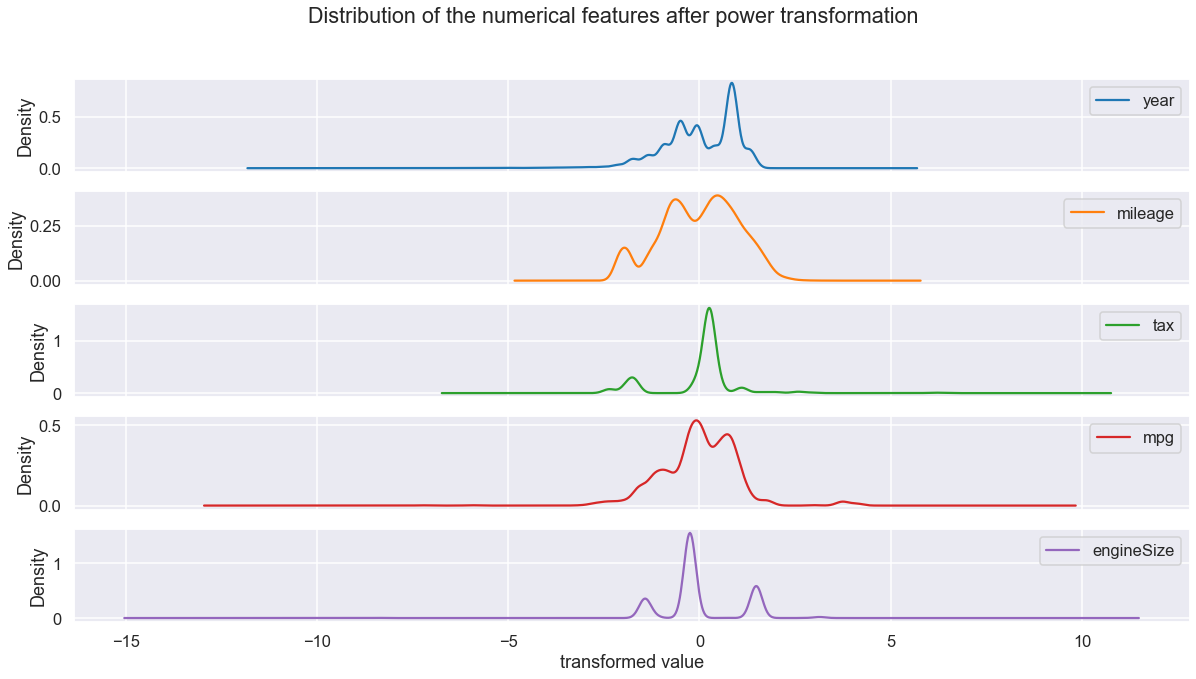

In [6]:
train[numeric_cols].plot(kind='kde', subplots=True, figsize=(20,10), 
                         title="Distribution of the numerical features after power transformation")
plt.xlabel("transformed value")
plt.show()

#### one-hot encoding

In [7]:
# one-hot encoding
train = pd.get_dummies(train)

# Let's check the data
display(train.head())
display(train.info())

year   mileage       tax       mpg  engineSize  model_ 1 Series  \
0 -1.342833  1.376034 -0.076490  0.346900   -0.248848                0   
1  0.387343 -0.083649  0.241080 -0.758725   -0.248848                0   
2 -0.497436  1.295717  0.475549 -0.081679    1.483336                0   
3 -0.060080  0.398395  0.241080  1.224749   -1.425559                1   
4 -1.342833  0.779354  0.475549 -0.155037    1.483336                0   

   model_ 2 Series  model_ 3 Series  model_ 4 Series  model_ 5 Series  ...  \
0                0                0                0                1  ...   
1                0                0                0                0  ...   
2                0                0                0                1  ...   
3                0                0                0                0  ...   
4                0                0                0                0  ...   

   road_tax_range_below_150  mileage_range_Bad  mileage_range_Excellent  \
0                         1                  0                        0   
1                         1                  0                        1   
2                         0                  0                        0   
3                         1                  0                        1   
4                         0                  0                        1   

   mileage_range_Good  mileage_range_Medium  car_age_range_below_5  \
0                   1                     0                      0   
1                   0                     0                      1   
2                   1                     0                      1   
3                   0                     0                      1   
4                   0                     0                      0   

   car_age_range_between_10_to_15  car_age_range_between_15_to_20  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   car_age_range_between_5_to_10  car_age_range_greater_than_20  
0                              1                              0  
1                              0                              0  
2                              0                              0  
3                              0                              0  
4                              1                              0  

[5 rows x 53 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10686 entries, 0 to 10685
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   year                            10686 non-null  float64
 1   mileage                         10686 non-null  float64
 2   tax                             10686 non-null  float64
 3   mpg                             10686 non-null  float64
 4   engineSize                      10686 non-null  float64
 5   model_ 1 Series                 10686 non-null  uint8  
 6   model_ 2 Series                 10686 non-null  uint8  
 7   model_ 3 Series                 10686 non-null  uint8  
 8   model_ 4 Series                 10686 non-null  uint8  
 9   model_ 5 Series                 10686 non-null  uint8  
 10  model_ 6 Series                 10686 non-null  uint8  
 11  model_ 7 Series                 10686 non-null  uint8  
 12  model_ 8 Series                 

None

Before one-hot encoding, there were 12 features. 
<br>After one-hot encoding, there are 53 features.

### Feature Selection

Removing the features which have very low variance. Low variance features are considered insignificant for the prediction

In [8]:
def variance_threshold_selector(data, threshold):
    """
    This function removes the features with a variance lower than the threshold
    Args:
        data (dataFrame): pandas DataFrame
        threshold (float): Features with variance lower than this threshold will be removed
    Returns:
        a dataFrame with the actual index and column names
    """
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    
    return data[data.columns[selector.get_support(indices=True)]]

In [9]:
# number of features in the training set
n_features = train.shape[1]

# apply the variance threshold
train = variance_threshold_selector(train, 0.002)

# display(train.head())
# display(train.info())

print("Actual number of features in the dataset = ", n_features)

# after removing the features with lower variance
n_features_var_threshold = train.shape[1]
print("Number of remaining features in the dataset = ", n_features_var_threshold)

# percentage of reduction in features
p_reduced_features = int((n_features - n_features_var_threshold)*100/n_features)
print("Number of features reduced = ", n_features - n_features_var_threshold)
print("Percentage of total features reduced = ", p_reduced_features, "%")

Actual number of features in the dataset =  53
Number of remaining features in the dataset =  45
Number of features reduced =  8
Percentage of total features reduced =  15 %


#### Splitting the data for training and testing

In [10]:
# training size = 80%, test size = 20%
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2, random_state=42)

print('X_train :', X_train.shape)
print('y_train :', y_train.shape)
print('X_test :', X_test.shape)
print('y_test :', y_test.shape)

X_train : (8548, 45)
y_train : (8548, 1)
X_test : (2138, 45)
y_test : (2138, 1)


#### Feature Selection method: Recursive Feature Elimination (RFE)
RFE is an efficient approach for eliminating features from a training dataset and it selects those features in a training dataset that are most relevant in predicting the target variable. There are two important configuration options when using RFE: the choice in the number of features to select (n_features_to_select) and the choice of the algorithm used to help choose features (estimator).

RFE works by searching for a subset of features by starting with all features in the training dataset and successfully removing features until the desired number remains. This is achieved by fitting the given machine learning algorithm used in the core of the model, ranking features by importance, discarding the least important features, and re-fitting the model. This process is repeated until a specified number of features remains.

I have used XGB Regressor and done some experiment by varying the n_features_to_select from 45 to 30. Finally, I found that, starting with 45 features and removing the least important feature at each iteration, up to n_features_to_select=37, the model performs best.

ref: [3] https://machinelearningmastery.com/rfe-feature-selection-in-python/

In [11]:
rfe = RFE(estimator=xgb.XGBRegressor(random_state=42), n_features_to_select=37, step=1, verbose=1)
rfe = rfe.fit(X_train, y_train)

Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.


In [12]:
# list of selected features after the recursive feature elimination (RFE)
rfe_cols = X_train.columns[rfe.support_]

n_features_rfe = rfe_cols.shape[0]
print("Number of remaining features after Variance Threshold method and RFE = ", n_features_rfe)
print("Finally selected features for training = ", rfe_cols)

# percentage reduction of features from the actual number of features
p_reduced_features_rfe = int((n_features - n_features_rfe)*100/n_features)
print("Number of features reduced after Variance Thresholding and RFE = ", n_features - n_features_rfe)
print("Percentage of total features reduced = ", p_reduced_features_rfe, "%")

Number of remaining features after Variance Threshold method and RFE =  37
Finally selected features for training =  Index(['year', 'mileage', 'tax', 'mpg', 'engineSize', 'model_ 1 Series',
       'model_ 2 Series', 'model_ 3 Series', 'model_ 4 Series',
       'model_ 5 Series', 'model_ 6 Series', 'model_ 7 Series',
       'model_ 8 Series', 'model_ M3', 'model_ M4', 'model_ M5', 'model_ X1',
       'model_ X2', 'model_ X3', 'model_ X4', 'model_ X5', 'model_ X6',
       'model_ X7', 'model_ Z4', 'transmission_Automatic',
       'transmission_Manual', 'transmission_Semi-Auto', 'fuelType_Diesel',
       'fuelType_Hybrid', 'fuelType_Petrol', 'Engine_Size_large',
       'Engine_Size_medium', 'road_tax_range_150_300', 'mileage_range_Good',
       'mileage_range_Medium', 'car_age_range_between_10_to_15',
       'car_age_range_between_5_to_10'],
      dtype='object')
Number of features reduced after Variance Thresholding and RFE =  16
Percentage of total features reduced =  30 %


In [13]:
# keeping only the selected features from lower variance features removal and RFE
X_train = X_train[rfe_cols]
X_test = X_test[rfe_cols]

print(X_train.shape, X_test.shape)

(8548, 37) (2138, 37)


#### Linear Regression

In [14]:
# using statsmodel for the training
model_LR = sm.OLS(y_train, X_train)
result_LR = model_LR.fit()
print(result_LR.summary())

# prediction
y_pred_LR = result_LR.predict(X_test)

# mean absolute error
MAE_LR = mean_absolute_error(y_test, y_pred_LR)

# root mean squared error
RMSE_LR = np.sqrt(mean_squared_error(y_test, y_pred_LR))

# coefficient of determination
r2_LR = r2_score(y_test, y_pred_LR)

print("MAE : ", MAE_LR, "RMSE : ", RMSE_LR, "r2_score :", r2_LR)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     1874.
Date:                Tue, 06 Apr 2021   Prob (F-statistic):               0.00
Time:                        18:44:31   Log-Likelihood:                -82623.
No. Observations:                8548   AIC:                         1.653e+05
Df Residuals:                    8511   BIC:                         1.656e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
year        

**Null hypothesis:** There is no relationship between the feature and the target variable. That means the coefficient of the feature variable will be 0.
<br>When p-value < 0.05 for a feature, we can reject the null hypothesis, that means that feature has a relation with the target variable.

When p-value > 0.05, we can't reject the null hypothesis. 

That means all features of p-value<0.05 are important here.

<br>MAE lower is better
<br>RMSE lower is better
<br> r2_score greater is better
<br>MAE and RMSE are very high for the Linear Regression model and r2_score is also low. So, we'll now move to ensemble learning.

#### Saving the Cross-validation results

In [15]:
def cv_result(model):
    """
    This function returns the grid search and cross-validation results in a DataFrame
    Args:
        model: trained model
    Returns:
        a datafrmae
    """

    # create a new dataframe from the grid search cross-validation results
    cross_val_result = pd.DataFrame(model.cv_results_)
    
    # list of columns to drop
    drop_cols = ['mean_fit_time', 'std_fit_time', 'mean_score_time', 
                 'std_score_time', 'params']

    cross_val_result = cross_val_result.drop(drop_cols, axis=1)
    cross_val_result = cross_val_result.sort_values(by='rank_test_score')
    
    # return a dataframe
    return cross_val_result

#### Prediction and Key Performance Indicators

In [16]:
def model_output(X_test, y_test, model):
    """
    Args:
        X_test (dataFrame): testset features
        y_test (dataFrame): testset target variable
        model : trained model
    Returns:
        cv (dataFrame): cross-validation results
        y_pred (List[float]): predicted values
        MAE (float): Mean Absolute Error
        RMSE (float): Root Mean Squared Error
        r2 (float): R squared
    """
    
    # print the best hyperparameters after the grid search
    print("best hyperparameters :", model.best_params_)
    
    # save the cv results in a dataFrame by rank
    cv = cv_result(model)
    
    # prediction
    y_pred = np.round(model.predict(X_test), 2)
    
    # KPI
    MAE = np.round(mean_absolute_error(y_test, y_pred), 2)
    RMSE = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
    r2 = np.round(r2_score(y_test, y_pred), 2)
    
    display(cv.head())
    print("MAE : ", MAE, "RMSE : ", RMSE, "r2_score :", r2)
    
    return cv, y_pred, MAE, RMSE, r2

#### Decision Tree

In [17]:
model_DT = decision_tree_regressor(X_train, y_train, 
                                   ['mse'], 
                                   ['auto'], 
                                   np.arange(3,11,1).tolist(),
                                   np.arange(2,3,1).tolist(), 
                                   'neg_mean_absolute_error', 
                                   5)

runtime =  0.04 mins


In [18]:
cv_DT, y_pred_DT, MAE_DT, RMSE_DT, r2_DT = model_output(X_test, y_test, model_DT)

best hyperparameters : {'criterion': 'mse', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2}


param_criterion param_max_depth param_max_features param_min_samples_leaf  \
7             mse              10               auto                      2   
6             mse               9               auto                      2   
5             mse               8               auto                      2   
4             mse               7               auto                      2   
3             mse               6               auto                      2   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
7       -2123.126169       -2106.877345       -2104.950020       -2075.790134   
6       -2224.603552       -2215.722000       -2224.389983       -2150.817534   
5       -2342.775174       -2384.724060       -2328.946863       -2300.897548   
4       -2593.073707       -2572.900498       -2453.472536       -2513.133915   
3       -2867.233529       -2842.085581       -2694.851128       -2729.895114   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
7       -2163.953038     -2114.939341       28.868008                1  
6       -2216.748761     -2206.456366       28.065637                2  
5       -2406.377192     -2352.744168       38.086689                3  
4       -2667.641570     -2560.044445       72.651939                4  
3       -2887.863751     -2804.385820       77.312852                5

MAE :  2016.92 RMSE :  3057.8 r2_score : 0.93


- MAE of Decision Tree < MAE of Linear Regression
- RMSE of Decision Tree < RMSE of Linear Regression
- R squared of Decision Tree > R squared of Linear Regression

#### Random Forest

In [19]:
model_RF = random_forest_regressor(X_train, y_train, 
                                   ['mse'], 
                                   np.arange(100,501,100).tolist(), 
                                   [False], 
                                   ['auto'],
                                   [None], 
                                   np.arange(2,3,1).tolist(), 
                                   'neg_mean_absolute_error', 
                                   5)

runtime =  0.68 mins


In [20]:
cv_RF, y_pred_RF, MAE_RF, RMSE_RF, r2_RF = model_output(X_test, y_test, model_RF)

best hyperparameters : {'bootstrap': False, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 300}


param_bootstrap param_criterion param_max_depth param_max_features  \
2           False             mse            None               auto   
1           False             mse            None               auto   
3           False             mse            None               auto   
4           False             mse            None               auto   
0           False             mse            None               auto   

  param_min_samples_leaf param_n_estimators  split0_test_score  \
2                      2                300       -1959.946302   
1                      2                200       -1959.542774   
3                      2                400       -1960.015491   
4                      2                500       -1960.200430   
0                      2                100       -1959.638812   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
2       -1983.056102       -1895.094247       -1951.441006       -1985.370873   
1       -1982.930444       -1896.106879       -1951.528263       -1985.429224   
3       -1982.981902       -1896.551189       -1951.710800       -1985.498030   
4       -1982.596342       -1897.104248       -1951.576896       -1985.682615   
0       -1982.493005       -1898.048289       -1951.683510       -1985.372516   

   mean_test_score  std_test_score  rank_test_score  
2     -1954.981706       32.666083                1  
1     -1955.107517       32.270975                2  
3     -1955.351482       32.139497                3  
4     -1955.432106       31.914660                4  
0     -1955.447226       31.474975                5

MAE :  1823.86 RMSE :  2939.67 r2_score : 0.93


- MAE of Random Forest < MAE of Decision Tree < MAE of Linear Regression
- RMSE of Random Forest < RMSE of Decision Tree < RMSE of Linear Regression
- R squared of Random Forest > R squared of Decision Tree > R squared of Linear Regression

#### Gradient Boosting

In [21]:
model_GB = gradient_boosting_regressor(X_train, y_train, 
                                       ['mse'],
                                       np.arange(3,11,1).tolist(), 
                                       np.arange(100,301,100).tolist(), 
                                       [0.1], 
                                       'neg_mean_absolute_error', 
                                       5)

runtime =  0.89 mins


In [22]:
cv_GB, y_pred_GB, MAE_GB, RMSE_GB, r2_GB = model_output(X_test, y_test, model_GB)

best hyperparameters : {'criterion': 'mse', 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300}


param_criterion param_learning_rate param_max_depth param_n_estimators  \
11             mse                 0.1               6                300   
8              mse                 0.1               5                300   
13             mse                 0.1               7                200   
14             mse                 0.1               7                300   
10             mse                 0.1               6                200   

    split0_test_score  split1_test_score  split2_test_score  \
11       -1574.682049       -1542.515066       -1474.668713   
8        -1570.784343       -1527.032205       -1492.551812   
13       -1567.721436       -1541.218849       -1503.294323   
14       -1554.943416       -1549.960338       -1515.602823   
10       -1587.527546       -1550.133694       -1486.347447   

    split3_test_score  split4_test_score  mean_test_score  std_test_score  \
11       -1517.705686       -1502.250524     -1522.364408       34.188699   
8        -1519.253370       -1526.821033     -1527.288552       25.153025   
13       -1502.831478       -1523.312396     -1527.675696       24.567471   
14       -1493.768429       -1526.979226     -1528.250846       22.514093   
10       -1523.914185       -1521.527483     -1533.890071       33.625844   

    rank_test_score  
11                1  
8                 2  
13                3  
14                4  
10                5

MAE :  1464.75 RMSE :  2365.82 r2_score : 0.96


- MAE of Gradient Boosting < MAE of Random Forest < MAE of Decision Tree < MAE of Linear Regression
- RMSE of Gradient Boosting < RMSE of Random Forest < RMSE of Decision Tree < RMSE of Linear Regression
- R squared of Gradient Boosting > R squared of Random Forest > R squared of Decision Tree > R squared of Linear Regression

#### Extreme Gradient Boosting

In [23]:
model_XGB = X_gradient_boosting_regressor(X_train, y_train,
                                          np.arange(3,11,1).tolist(), 
                                          np.arange(100,501,100).tolist(), 
                                          [0.1],
                                          'neg_mean_absolute_error', 
                                          5)

runtime =  2.07 mins


In [24]:
cv_XGB, y_pred_XGB, MAE_XGB, RMSE_XGB, r2_XGB = model_output(X_test, y_test, model_XGB)

best hyperparameters : {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 400}


param_learning_rate param_max_depth param_n_estimators  split0_test_score  \
18                 0.1               6                400       -1548.443433   
19                 0.1               6                500       -1551.037625   
17                 0.1               6                300       -1546.647913   
26                 0.1               8                200       -1569.183981   
35                 0.1              10                100       -1561.962214   

    split1_test_score  split2_test_score  split3_test_score  \
18       -1521.667649       -1479.930743       -1491.860322   
19       -1528.209189       -1479.620573       -1487.072423   
17       -1522.372187       -1487.575072       -1504.959243   
26       -1520.256402       -1484.639929       -1494.687989   
35       -1518.462203       -1504.691256       -1490.630900   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
18       -1513.179818     -1511.016393       23.883826                1  
19       -1520.999738     -1513.387910       26.562564                2  
17       -1511.577291     -1514.626341       19.595407                3  
26       -1530.399592     -1519.833579       29.726000                4  
35       -1526.777157     -1520.504746       24.102904                5

MAE :  1455.29 RMSE :  2295.05 r2_score : 0.96


- MAE of XGB < MAE of Gradient Boosting < MAE of Random Forest < MAE of Decision Tree < MAE of Linear Regression
- RMSE of XGB < RMSE of Gradient Boosting < RMSE of Random Forest < RMSE of Decision Tree < RMSE of Linear Regression
- R squared of XGB = R squared of Gradient Boosting > R squared of Random Forest > R squared of Decision Tree > R squared of Linear Regression

#### Extreme Gradient Boosting with target variable transformation

In [25]:
model_XGB_T = X_gradient_boosting_TT_regressor(X_train, y_train,
                                              np.arange(3,11,1).tolist(), 
                                              np.arange(100,501,100).tolist(), 
                                              [0.1],
                                              'neg_mean_absolute_error', 
                                               5)

runtime =  1.99 mins


In [26]:
cv_XGB_T, y_pred_XGB_T, MAE_XGB_T, RMSE_XGB_T, r2_XGB_T = model_output(X_test, y_test, model_XGB_T)

best hyperparameters : {'TargetTransformed__regressor__learning_rate': 0.1, 'TargetTransformed__regressor__max_depth': 6, 'TargetTransformed__regressor__n_estimators': 400}


param_TargetTransformed__regressor__learning_rate  \
18                                               0.1   
19                                               0.1   
14                                               0.1   
13                                               0.1   
17                                               0.1   

   param_TargetTransformed__regressor__max_depth  \
18                                             6   
19                                             6   
14                                             5   
13                                             5   
17                                             6   

   param_TargetTransformed__regressor__n_estimators  split0_test_score  \
18                                              400       -1546.473186   
19                                              500       -1545.904113   
14                                              500       -1530.332141   
13                                              400       -1530.276744   
17                                              300       -1556.710463   

    split1_test_score  split2_test_score  split3_test_score  \
18       -1463.773385       -1459.642691       -1493.117043   
19       -1463.195808       -1460.440092       -1490.955601   
14       -1472.055736       -1457.463081       -1499.757886   
13       -1473.325948       -1465.987282       -1502.921317   
17       -1468.771489       -1467.374162       -1502.540268   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
18       -1459.573396     -1484.515940       33.417786                1  
19       -1466.746704     -1485.448464       32.110962                2  
14       -1481.972606     -1488.316290       25.110995                3  
13       -1480.357144     -1490.573687       23.388674                4  
17       -1459.505116     -1490.980300       36.042351                5

MAE :  1452.07 RMSE :  2300.11 r2_score : 0.96


- MAE of XGB with target variable transformation < MAE of XGB < MAE of Gradient Boosting < MAE of Random Forest < MAE of Decision Tree < MAE of Linear Regression
- RMSE of XGB with target variable transformation > RMSE of XGB < RMSE of Gradient Boosting < RMSE of Random Forest < RMSE of Decision Tree < RMSE of Linear Regression
- R squared of XGB with target variable transformation = R squared of XGB = R squared of Gradient Boosting > R squared of Random Forest > R squared of Decision Tree > R squared of Linear Regression

XGB with the target variable transformation (XGB_T) performed better than XGB without target variable transformation. If we look at the cross-validation for the XGB with the target variable transformation (XGB_T), it's mean_test_score (MAE) is 1484.5. On the other hand, XGB without target variable transformation has mean_test_score (MAE) of 1511. For both models, the standard deviation of the cv scores are very close to each other which confirm that these models are not overfitting or underfitting.

In [28]:
# let's create a new dataFrame with the actual and predicted prices
output = y_test.copy()

output['DT'] = y_pred_DT
output['RF'] = y_pred_RF
output['GB'] = y_pred_GB
output['XGB'] = y_pred_XGB
output['XGB_T'] = y_pred_XGB_T

output['XGB_abs_err'] = np.abs(output['price']-output['XGB'])
output['XGB_T_abs_err'] = np.abs(output['price']-output['XGB_T'])

display(output.head())

price        DT        RF        GB           XGB         XGB_T  \
3487  20998  21915.84  20748.50  22004.70  21799.570312  21592.750000   
668   33998  34653.00  33999.50  36181.12  36564.230469  35644.261719   
5998  25990  22994.76  22308.67  25634.51  25612.119141  25089.939453   
6196  20000  18132.61  20027.00  18797.53  18890.500000  19337.550781   
1523  12290  12258.50  12296.33  10672.74  10544.690430  10675.679688   

      XGB_abs_err  XGB_T_abs_err  
3487   801.570312     594.750000  
668   2566.230469    1646.261719  
5998   377.880859     900.060547  
6196  1109.500000     662.449219  
1523  1745.309570    1614.320312

In [29]:
# Let's check the summary statistics of the absolute errors of the best two models
output[['XGB_abs_err', 'XGB_T_abs_err']].describe()

XGB_abs_err  XGB_T_abs_err
count   2138.000000    2138.000000
mean    1455.290238    1452.068995
std     1775.062718    1784.234447
min        0.550781       0.040039
25%      426.060059     448.580078
50%     1003.939941     988.644531
75%     1815.188232    1824.197266
max    29680.261719   30429.781250

75% of the absolute errors are below $1825

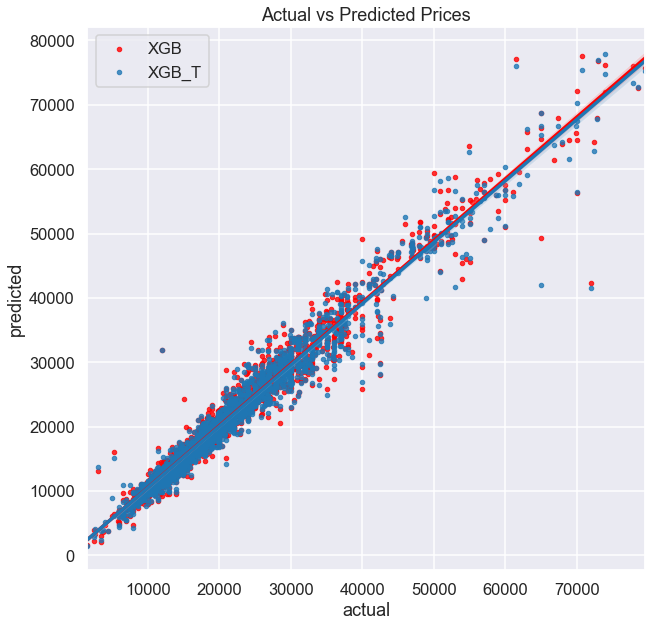

In [31]:
plt.figure(figsize=(10,10))

sns.regplot(y='XGB', x='price', data=output, color='red', marker=".", label='XGB')
sns.regplot(y='XGB_T', x='price', data=output, marker=".", label='XGB_T')
plt.legend()
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title("Actual vs Predicted Prices")
plt.show()

- When Car price < \\$40,000, predicted prices are close to the actual prices. 
- When Car price > \\$40,000, predicted prices went away from the actual prices.
- XGB (red) predictions are far more away from the actual prices (fitted straight line). 

Based on the above plot, target transformation has improved the model performance

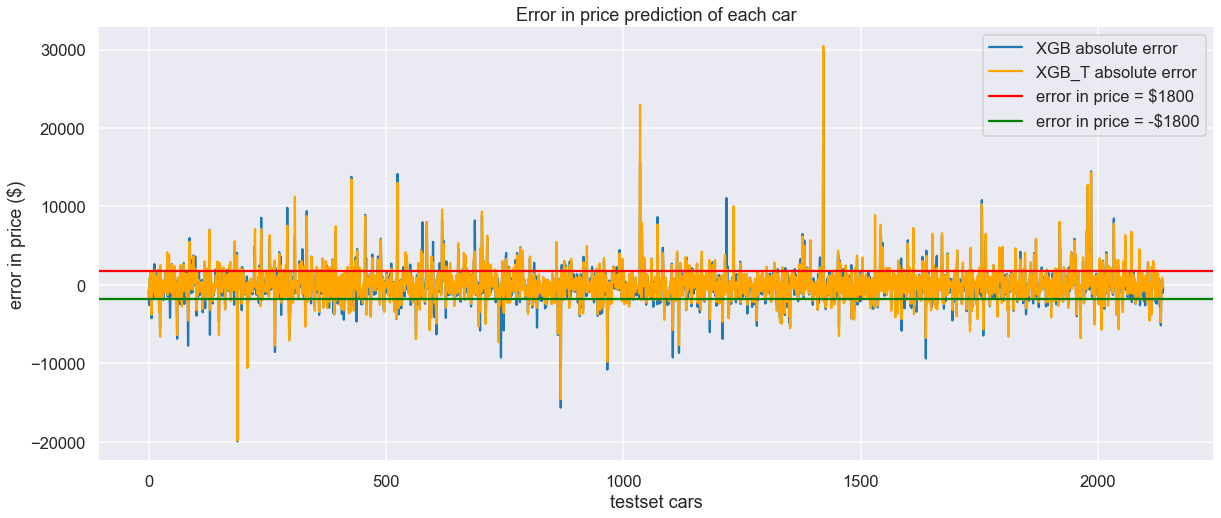

In [33]:
plt.figure(figsize=(20,8))

plt.plot([i for i in range(len(output))], output.price-output.XGB, label='XGB absolute error')
plt.plot([i for i in range(len(output))], output.price-output.XGB_T, color='orange', label='XGB_T absolute error')

plt.axhline(y=1800, color='r', linestyle='-', label = 'error in price = $1800')
plt.axhline(y=-1800, color='g', linestyle='-', label = 'error in price = -$1800')

plt.xlabel("testset cars")
plt.ylabel("error in price ($)")
plt.title("Error in price prediction of each car")

plt.legend()
plt.show()

- nealry 75% of error in car's price lie within the -1800 (green staright line) to 1800 (red straight line)

#### Tree Diagram of the XGB model

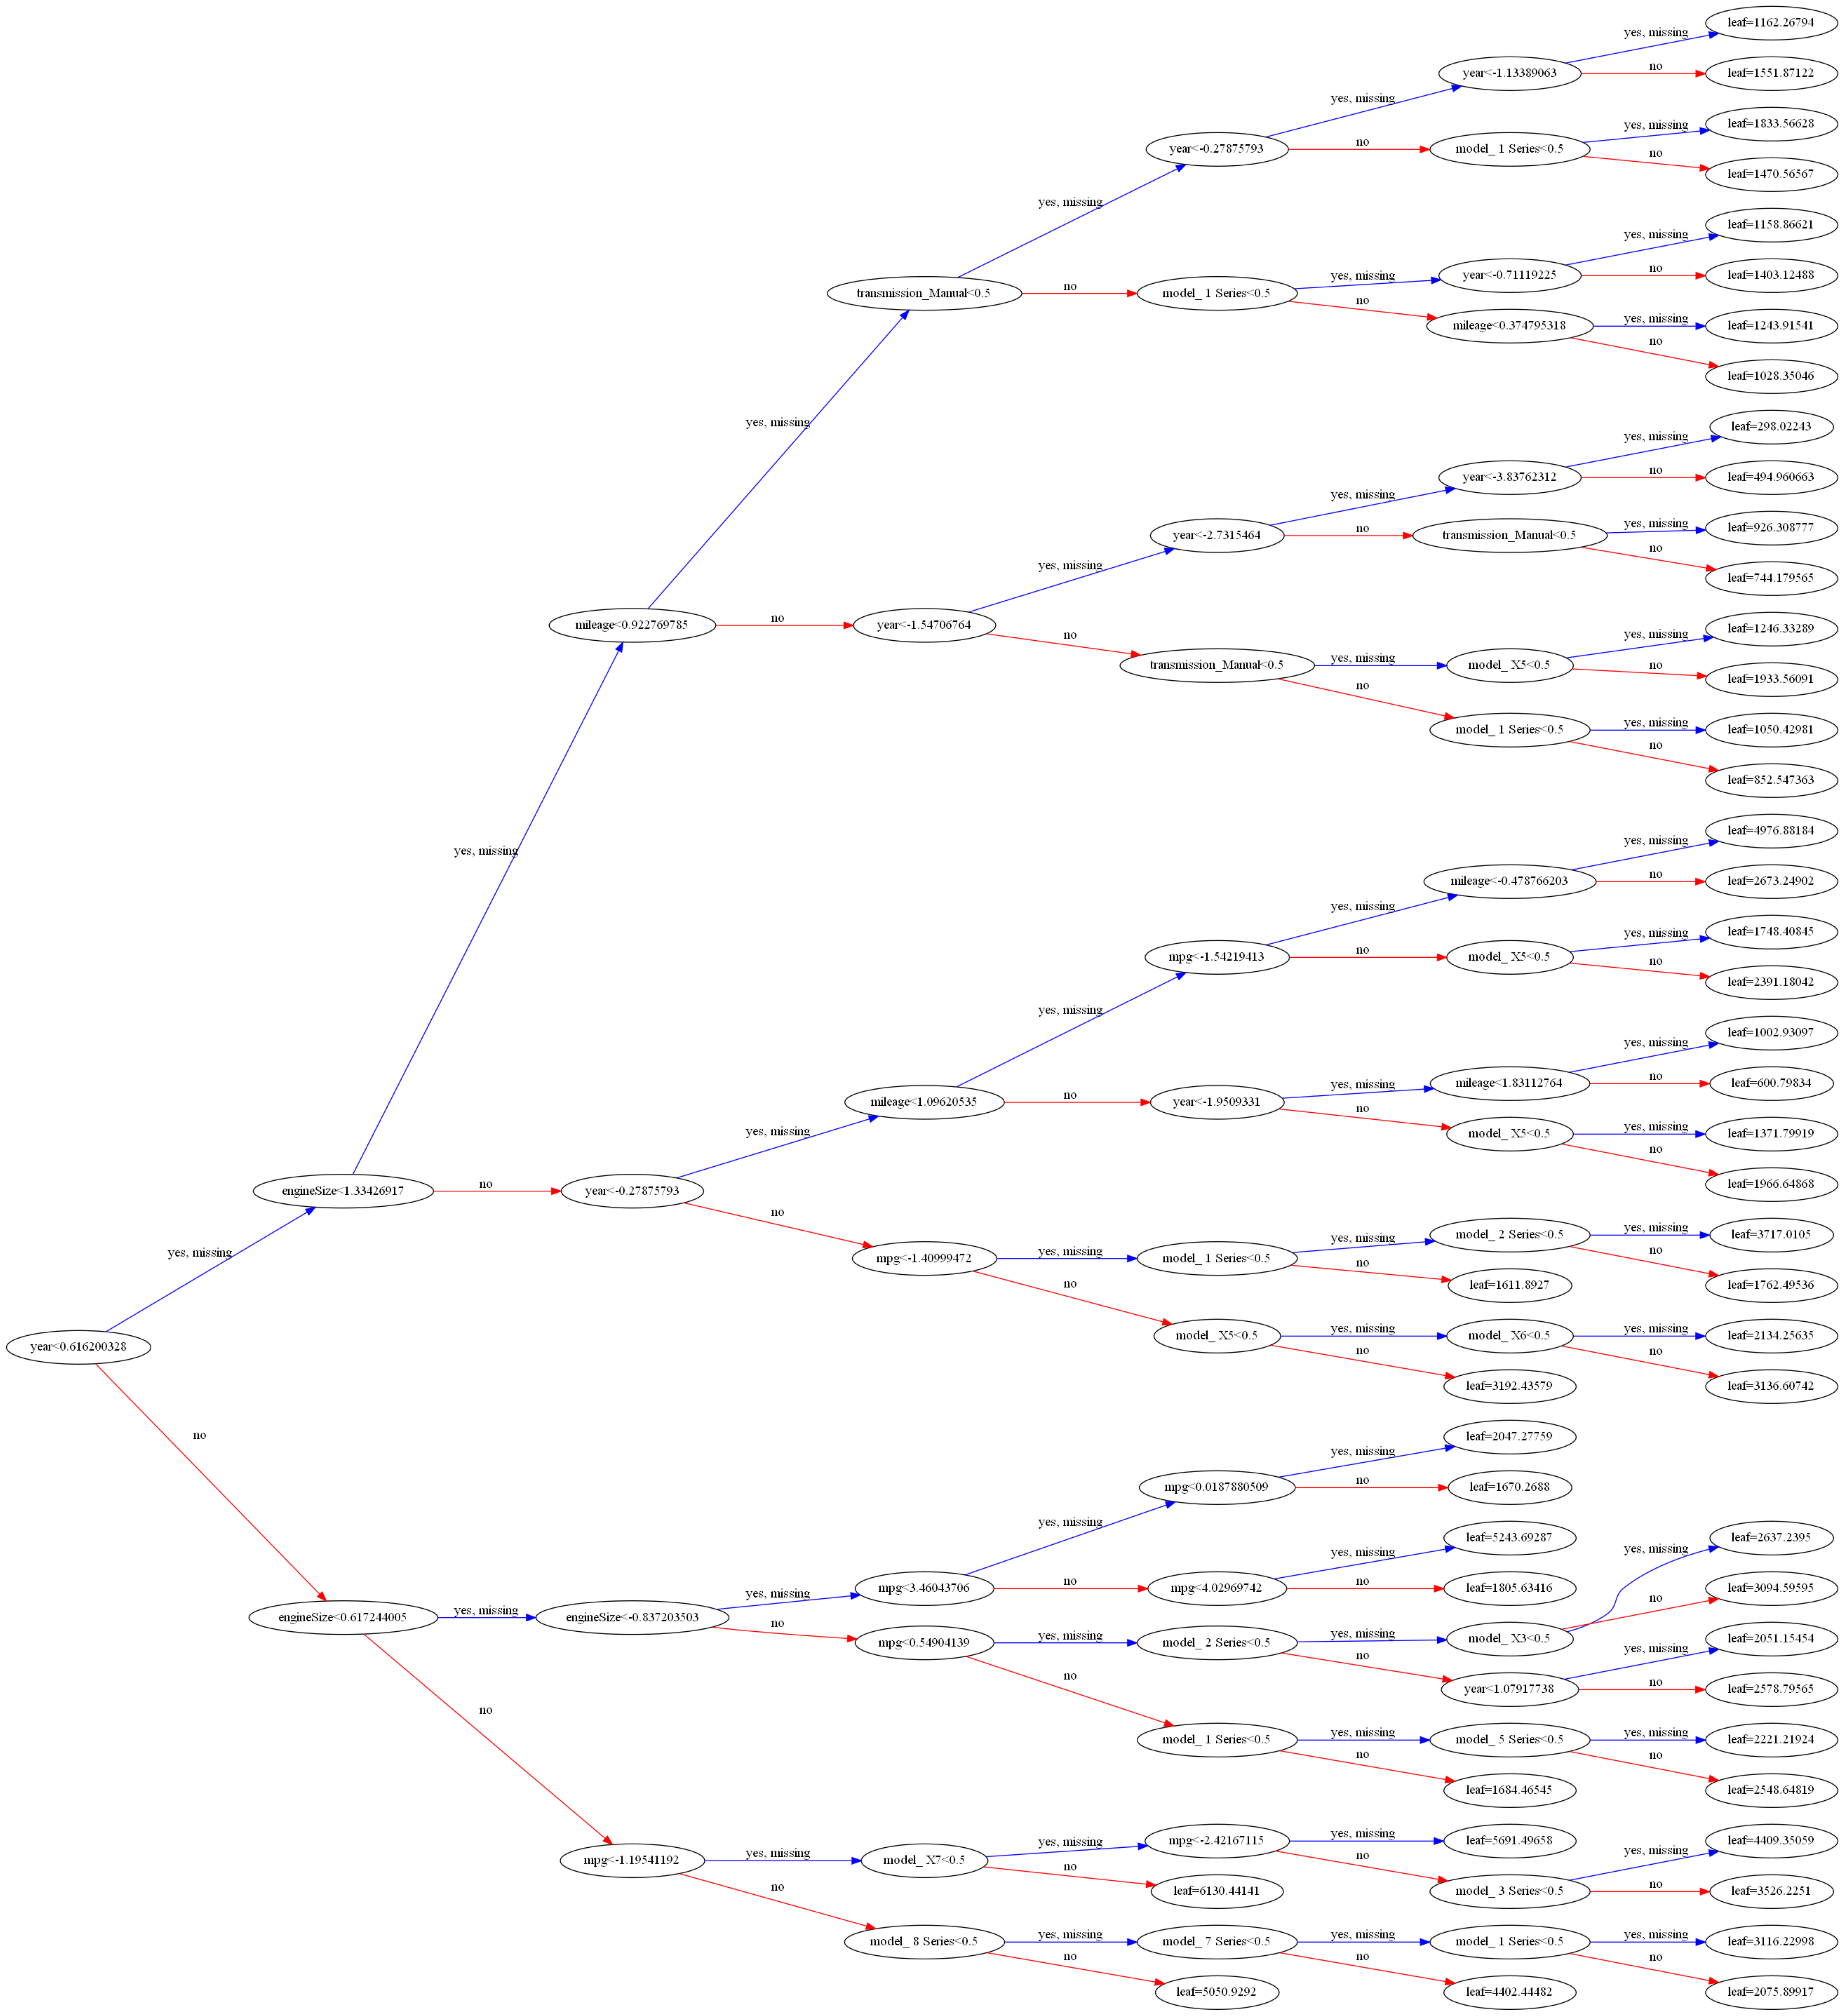

In [34]:
plot_tree(model_XGB.best_estimator_, num_trees=1, rankdir='LR')
plt.gcf().set_size_inches(100, 100)
plt.show()

I wish I could make it more visible. Tree diagram is the best way to understand the ensemble models.

#### Barplot of the feature importance

In [35]:
def feature_importance(model, x, regressor_algorithm):
    # find the important features
    importances = model.best_estimator_.feature_importances_

    # Sort importances
    sorted_index = np.argsort(importances)

    # Create labels
    labels = x.columns[sorted_index]

    # Create plot
    _ = plt.barh(range(x.shape[1]), importances[sorted_index], tick_label=labels)
    _ = plt.title("feature importance for " + regressor_algorithm)
    _ = plt.xlabel("feature importance")

    return _

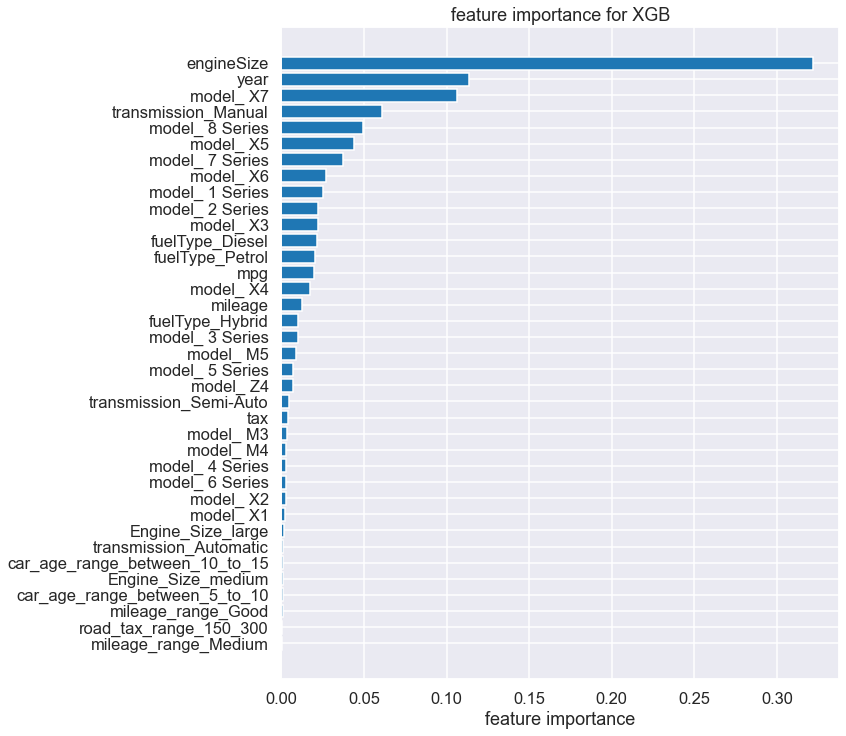

In [36]:
# feature importance for XGB
plt.figure(figsize=(10,12))
feature_importance(model_XGB, X_train, 'XGB')
plt.show()

- **'engineSize'** has the highest feature importance to predict the price of a car. As far as we know, lower the engine size provides better mpg. From the correlation plot, 'engineSize' has the second highest positive correlation with the target variabel price.
- **'year'** is the second highest important feature, which is true. More latest the car, more expensive it is. From the correlation plot, **'year'** has the highest positive correlation with the target variabel price.
- **manual transmission** is an important feature. From the boxenplots, manual transmission cars are cheaper than automatic or semi-auto cars. From the actual vs predicted prices plot, the XGB models predicted quite well for the lower price cars.
- model X7, 8 Series got high importance. These two models have the highest mean price in the dataset.
- fuelType Diesel, Petrol and Hybrid are important features

#### Comparison of different Machine Learning Models

ML_models      MAE     RMSE  R squared
0       Linear Regression  2509.06  3620.37       0.90
1           Decision Tree  2016.92  3057.80       0.93
2           Random Forest  1823.86  2939.67       0.93
3       Gradient Boosting  1464.75  2365.82       0.96
4                     XGB  1455.29  2295.05       0.96
5  XGB_target_transformed  1452.07  2300.11       0.96

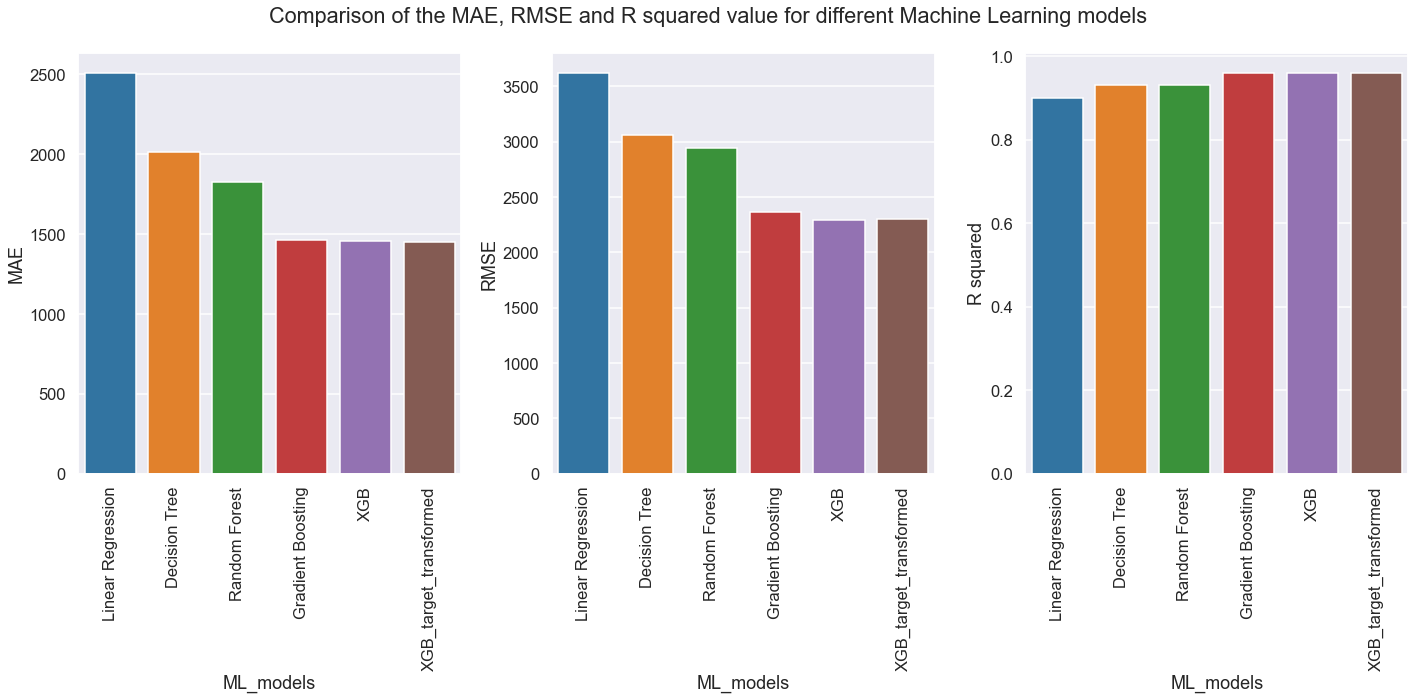

In [37]:
MAE = [MAE_LR, MAE_DT, MAE_RF, MAE_GB, MAE_XGB, MAE_XGB_T]
RMSE = [RMSE_LR, RMSE_DT, RMSE_RF, RMSE_GB, RMSE_XGB, RMSE_XGB_T]
r2 = [r2_LR, r2_DT, r2_RF, r2_GB, r2_XGB, r2_XGB_T]
ML_models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGB', 'XGB_target_transformed']

kpi_comparison = pd.DataFrame({"ML_models":ML_models, "MAE":MAE, "RMSE":RMSE, "R squared":r2})
kpi_comparison = kpi_comparison.round(2)
display(kpi_comparison)

plt.figure(figsize=(20,10))

for col in range(1, kpi_comparison.shape[1]):
    plt.subplot(1,3,col)
    sns.barplot(x = 'ML_models', y = kpi_comparison.columns[col], data=kpi_comparison)
    plt.xticks(rotation=90)

plt.suptitle("Comparison of the MAE, RMSE and R squared value for different Machine Learning models")
plt.tight_layout()
plt.show()

Finally, comapring 6 machine learning models with 3 different accuracy metrics, the best models are by rank:
1. XGB with target transformation (lowest MAE in test and cross-validation set, second lowest RMSE but very close to the lowest RMSE value, highest R squared)
2. XGB without target transformation (second lowest MAE in test and cross-validation set, highest lowest RMSE, highest R squared)
3. Gradient Boosting Regressor
4. Random Forest Regressor
5. Decision Tree Regressor
6. Linear Regression

I also tried with the PCA and took the best 12 PCA features which represent 95% variance of the total features but after applying XGB, it didn't imrpove the model performance. In future, in order to make the prediction more accurate, we can suggest to add few new features in the dataset such as accident history, car's internal and exterior condition, car title, color, location etc.